# Data Processing

For convenience data is separated in a single CSV file, and plotted to see if there is visual tendency. This is done in order to better understand the problem.

SalesDate
2015-01-01    1210.0
2015-01-02    1288.0
2015-01-03    1241.0
2015-01-04    1173.0
2015-01-05    1274.0
Name:  Quantity, dtype: float64


/home/manuel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


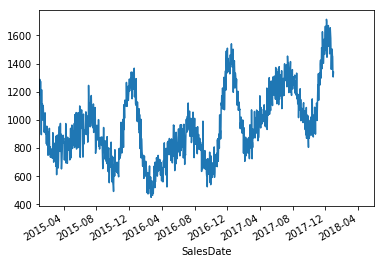

In [1]:
# line plot of time series
from pandas import Series
from matplotlib import pyplot
# load dataset
series = Series.from_csv('Data A.csv', header=0).convert_objects(convert_numeric=True)
# display first few rows
print(series.head(5))
# line plot of dataset
series.plot()
pyplot.show()

# Optimized Persistence Forecast

I will be using the Optimized Persistence Forecast Model, OPF, or Naive Forecast, which involves using the previous observation to predict the next time step. In order to determine the period of observation, we will examine each of point observations in a persistence model. Each configuration will be evaluated using the test harness and RMSE scores collected. The scores and graph the relationship between the persisted time step and the model skill will be plotted to determine the best period of observation.

/home/manuel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


(1181,)
p=1 RMSE:97.249
p=2 RMSE:108.167
p=3 RMSE:106.729
p=4 RMSE:105.295
p=5 RMSE:104.532
p=6 RMSE:114.412
p=7 RMSE:119.522
p=8 RMSE:125.656
p=9 RMSE:130.001
p=10 RMSE:132.250
p=11 RMSE:141.838
p=12 RMSE:147.191
p=13 RMSE:151.780
p=14 RMSE:155.140
p=15 RMSE:163.920
p=16 RMSE:172.669
p=17 RMSE:174.081
p=18 RMSE:179.619
p=19 RMSE:188.273
p=20 RMSE:196.442
p=21 RMSE:198.156
p=22 RMSE:203.446
p=23 RMSE:208.972
p=24 RMSE:216.891
p=25 RMSE:222.045
p=26 RMSE:225.162
p=27 RMSE:231.685
p=28 RMSE:238.301
p=29 RMSE:241.961
p=30 RMSE:250.082
p=31 RMSE:254.606
p=32 RMSE:260.564
p=33 RMSE:264.172
p=34 RMSE:271.705
p=35 RMSE:277.666
p=36 RMSE:280.555
p=37 RMSE:287.514
p=38 RMSE:291.274
p=39 RMSE:295.964
p=40 RMSE:301.165
p=41 RMSE:306.452
p=42 RMSE:309.310
p=43 RMSE:310.840
p=44 RMSE:317.329
p=45 RMSE:321.212
p=46 RMSE:326.895
p=47 RMSE:330.363
p=48 RMSE:329.440
p=49 RMSE:334.834
p=50 RMSE:338.148
p=51 RMSE:339.907
p=52 RMSE:343.565
p=53 RMSE:343.887
p=54 RMSE:347.474
p=55 RMSE:350.335
p=56 RMSE:35

p=676 RMSE:333.381
p=677 RMSE:327.642
p=678 RMSE:324.592
p=679 RMSE:322.750
p=680 RMSE:320.570
p=681 RMSE:318.352
p=682 RMSE:315.513
p=683 RMSE:317.879
p=684 RMSE:318.761
p=685 RMSE:317.161
p=686 RMSE:320.893
p=687 RMSE:320.994
p=688 RMSE:324.311
p=689 RMSE:324.129
p=690 RMSE:325.963
p=691 RMSE:328.950
p=692 RMSE:330.156
p=693 RMSE:335.359
p=694 RMSE:337.869
p=695 RMSE:344.239
p=696 RMSE:345.554
p=697 RMSE:349.808
p=698 RMSE:354.890
p=699 RMSE:359.247
p=700 RMSE:361.243
p=701 RMSE:367.605
p=702 RMSE:371.244
p=703 RMSE:376.329
p=704 RMSE:380.091
p=705 RMSE:383.992
p=706 RMSE:388.173
p=707 RMSE:393.664
p=708 RMSE:396.780
p=709 RMSE:400.918
p=710 RMSE:405.591
p=711 RMSE:411.911
p=712 RMSE:415.632
p=713 RMSE:420.251
p=714 RMSE:422.605
p=715 RMSE:426.690
p=716 RMSE:432.406
p=717 RMSE:437.439
p=718 RMSE:440.390
p=719 RMSE:444.441
p=720 RMSE:446.579
p=721 RMSE:453.280
p=722 RMSE:458.909
p=723 RMSE:460.321
p=724 RMSE:465.299
p=725 RMSE:465.718
p=726 RMSE:467.875
p=727 RMSE:473.608
p=728 RMSE:4

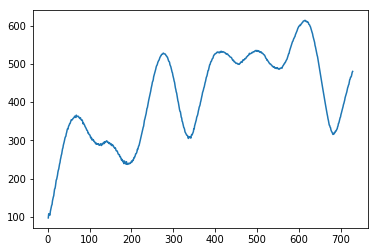

In [2]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
# load data
series = Series.from_csv('Data A.csv', header=0).convert_objects(convert_numeric=True)
# prepare data
X = series.values
print(X.shape)
train, test = X[0:856], X[856:1029]
persistence_values = range(1, 730)
scores = list()
for p in persistence_values:
	# walk-forward validation
	history = [x for x in train]
	predictions = list()
	for i in range(len(test)):
		# make prediction
		yhat = history[-p]
		predictions.append(yhat)
		# observation
		history.append(test[i])
	# report performance
	rmse = sqrt(mean_squared_error(test, predictions))
	scores.append(rmse)
	print('p=%d RMSE:%.3f' % (p, rmse))
# plot scores over persistence values
pyplot.plot(persistence_values, scores)
pyplot.show()

From the graph (and the results) it can be seen that periods of observation of 182, 336 and 682 days can be used, which in turn represents observations of 6 and 12 months.

# Evaluate Model

In order to evaluate this model, the last 6 months of data were used for testing. The following graph shows in orange the predicted values, and in blue the expected values.

/home/manuel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


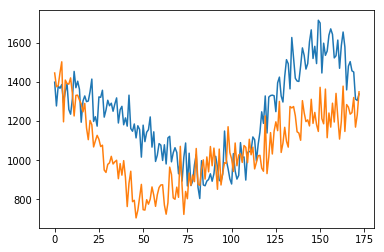

In [4]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
# load data
series = Series.from_csv('Data A.csv', header=0).convert_objects(convert_numeric=True)
# prepare data
X = series.values
train, test = X[0:856], X[856:1029]
#train, test = X[0:1029], X[1029:1181]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	yhat = history[-182]
	predictions.append(yhat)
	# observation
	history.append(test[i])
# plot predictions vs observations
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

# Prediction

Prediction for 2018 (January 1st to June 1st) is shown below. 

/home/manuel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


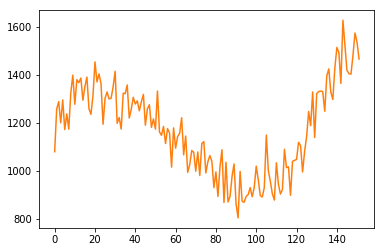

In [5]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
# load data
series = Series.from_csv('Data A.csv', header=0).convert_objects(convert_numeric=True)
# prepare data
X = series.values
#train, test = X[0:856], X[856:1029]
train, test = X[0:1029], X[1029:1181]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	yhat = history[-182]
	predictions.append(yhat)
	# observation
	history.append(test[i])
# plot predictions vs observations
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()